# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du Réseau Sentinelles. Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine:](http://www.sentiweb.fr/datasets/all/inc-7-PAY.json)

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant skiprows=1.

In [3]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202542          7   4579     2254    6904       7           4   
1     202541          7   3830     1951    5709       6           3   
2     202540          7   2513      964    4062       4           2   
3     202539          7   3063     1367    4759       5           2   
4     202538          7   1195        0    2448       2           0   
5     202537          7   1120       11    2229       2           0   
6     202536          7   1575      320    2830       2           0   
7     202535          7   1327      162    2492       2           0   
8     202534          7   1438       48    2828       2           0   
9     202533          7   3579      692    6466       5           1   
10    202532          7   2384        0    4809       4           0   
11    202531          7   5703        0   13082       9           0   
12    202530          7   7102     3590   10614      11           6   
13    202529          7   6385     3384    9386      10           6   
14    202528          7   5584     3123    8045       8           4   
15    202527          7   5667     2850    8484       8           4   
16    202526          7   5872     3285    8459       9           5   
17    202525          7   5953     3698    8208       9           6   
18    202524          7   4580     2558    6602       7           4   
19    202523          7   4911     2663    7159       7           4   
20    202522          7   6837     3940    9734      10           6   
21    202521          7   4693     2653    6733       7           4   
22    202520          7   3083     1535    4631       5           3   
23    202519          7   5084     1997    8171       8           3   
24    202518          7   5003     2718    7288       7           4   
25    202517          7   6246     3424    9068       9           5   
26    202516          7   6151     3193    9109       9           5   
27    202515          7   5557     3262    7852       8           5   
28    202514          7   4984     2858    7110       7           4   
29    202513          7   5964     3608    8320       9           5   
...      ...        ...    ...      ...     ...     ...         ...   
1790  199126          7  17608    11304   23912      31          20   
1791  199125          7  16169    10700   21638      28          18   
1792  199124          7  16171    10071   22271      28          17   
1793  199123          7  11947     7671   16223      21          13   
1794  199122          7  15452     9953   20951      27          17   
1795  199121          7  14903     8975   20831      26          16   
1796  199120          7  19053    12742   25364      34          23   
1797  199119          7  16739    11246   22232      29          19   
1798  199118          7  21385    13882   28888      38          25   
1799  199117          7  13462     8877   18047      24          16   
1800  199116          7  14857    10068   19646      26          18   
1801  199115          7  13975     9781   18169      25          18   
1802  199114          7  12265     7684   16846      22          14   
1803  199113          7   9567     6041   13093      17          11   
1804  199112          7  10864     7331   14397      19          13   
1805  199111          7  15574    11184   19964      27          19   
1806  199110          7  16643    11372   21914      29          20   
1807  199109          7  13741     8780   18702      24          15   
1808  199108          7  13289     8813   17765      23          15   
1809  199107          7  12337     8077   16597      22          15   
1810  199106          7  10877     7013   14741      19          12   
1811  199105          7  10442     6544   14340      18          11   
1812  199104          7   7913     4563   11263      14           8   
1813  199103          7  15387    10484   20290      27          18   
1814  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [5]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202542          7   4579     2254    6904       7           4   
1     202541          7   3830     1951    5709       6           3   
2     202540          7   2513      964    4062       4           2   
3     202539          7   3063     1367    4759       5           2   
4     202538          7   1195        0    2448       2           0   
5     202537          7   1120       11    2229       2           0   
6     202536          7   1575      320    2830       2           0   
7     202535          7   1327      162    2492       2           0   
8     202534          7   1438       48    2828       2           0   
9     202533          7   3579      692    6466       5           1   
10    202532          7   2384        0    4809       4           0   
11    202531          7   5703        0   13082       9           0   
12    202530          7   7102     3590   10614      11           6   
13    202529          7   6385     3384    9386      10           6   
14    202528          7   5584     3123    8045       8           4   
15    202527          7   5667     2850    8484       8           4   
16    202526          7   5872     3285    8459       9           5   
17    202525          7   5953     3698    8208       9           6   
18    202524          7   4580     2558    6602       7           4   
19    202523          7   4911     2663    7159       7           4   
20    202522          7   6837     3940    9734      10           6   
21    202521          7   4693     2653    6733       7           4   
22    202520          7   3083     1535    4631       5           3   
23    202519          7   5084     1997    8171       8           3   
24    202518          7   5003     2718    7288       7           4   
25    202517          7   6246     3424    9068       9           5   
26    202516          7   6151     3193    9109       9           5   
27    202515          7   5557     3262    7852       8           5   
28    202514          7   4984     2858    7110       7           4   
29    202513          7   5964     3608    8320       9           5   
...      ...        ...    ...      ...     ...     ...         ...   
1790  199126          7  17608    11304   23912      31          20   
1791  199125          7  16169    10700   21638      28          18   
1792  199124          7  16171    10071   22271      28          17   
1793  199123          7  11947     7671   16223      21          13   
1794  199122          7  15452     9953   20951      27          17   
1795  199121          7  14903     8975   20831      26          16   
1796  199120          7  19053    12742   25364      34          23   
1797  199119          7  16739    11246   22232      29          19   
1798  199118          7  21385    13882   28888      38          25   
1799  199117          7  13462     8877   18047      24          16   
1800  199116          7  14857    10068   19646      26          18   
1801  199115          7  13975     9781   18169      25          18   
1802  199114          7  12265     7684   16846      22          14   
1803  199113          7   9567     6041   13093      17          11   
1804  199112          7  10864     7331   14397      19          13   
1805  199111          7  15574    11184   19964      27          19   
1806  199110          7  16643    11372   21914      29          20   
1807  199109          7  13741     8780   18702      24          15   
1808  199108          7  13289     8813   17765      23          15   
1809  199107          7  12337     8077   16597      22          15   
1810  199106          7  10877     7013   14741      19          12   
1811  199105          7  10442     6544   14340      18          11   
1812  199104          7   7913     4563   11263      14           8   
1813  199103          7  15387    10484   20290      27          18   
1814  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète. Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de semaine. Nous utilisons pour cela la bibliothèque isoweek.Comme la conversion des semaines est devenu assez complexe, nous écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont dans une nouvelle colonne 'period'.

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

 Il restent deux petites modifications à faire.Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [7]:
sorted_data = data.set_index('period').sort_index()

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

 Un premier regard sur les données !

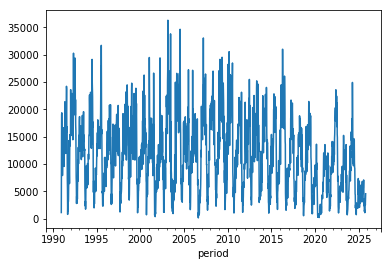

In [9]:
sorted_data['inc'].plot()

 Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

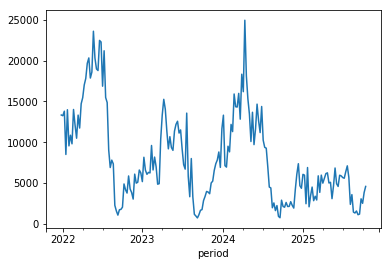

In [10]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

tant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er Janvier de l'année N au
1er Janvier de l'année N+1.Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er Janvier.Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [11]:
first_august_week = [pd.Period(pd.Timestamp(y, 1, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

 En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [12]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

 Voici les incidences annuelles.

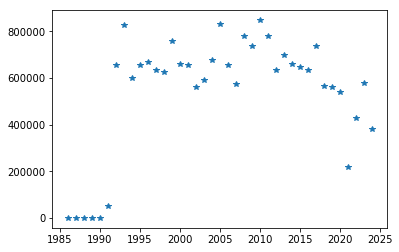

In [13]:
yearly_incidence.plot(style='*')

 Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [14]:
yearly_incidence.sort_values()

1986         0
1987         0
1988         0
1989         0
1990         0
1991     50677
2021    218007
2024    382480
2022    428532
2020    540874
2019    561400
2002    563415
2018    564245
2007    574493
2023    577745
2003    589547
1994    601390
1998    624302
1997    632212
2012    633840
2016    635356
2015    648607
2006    655727
1992    656000
2001    656975
1995    657596
2014    658318
2000    660461
1996    667294
2004    678928
2013    698277
2017    736724
2009    738993
1999    760258
2008    778119
2011    781579
1993    825671
2005    832896
2010    847724
dtype: int64

 Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

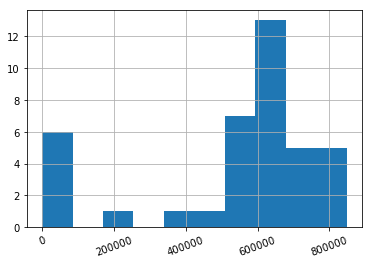

In [15]:
yearly_incidence.hist(xrot=20)